<a href="https://colab.research.google.com/github/shreyashrestha07/Projects/blob/main/Data_Mining_II_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CUS-615 Project 🐍
### Name: Shreya Shrestha
### Topic: Prediction of Coronary Heart Disease using Classification Algorithms
- Data Set Source : Kaggle (csv file)
- Link to Dataset : [link](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression)
--------------
#### Main Objecstives of the project: 📊
- To predict wheather a patient should be diagnosed with the risk of Coronoar Heart Disease (CHD) by extracting residents data from the city of Framingham.
- Experiment with various classification algorithms and see which classifier yeilds the highest accuracy.
- Examin the trends and correlations within the dataset.
- Deatermine which features are most important to Positive/Negative Diagnosis.

#### Importing packages

In [ ]:
import pandas as pd
import numpy as np
import statistics

# Vizualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['framingham.csv']))


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.rename(columns={"male": "sex"}, inplace=True) # to rename the column

In [ ]:
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


#### To plot the correlation heat map using seaborn

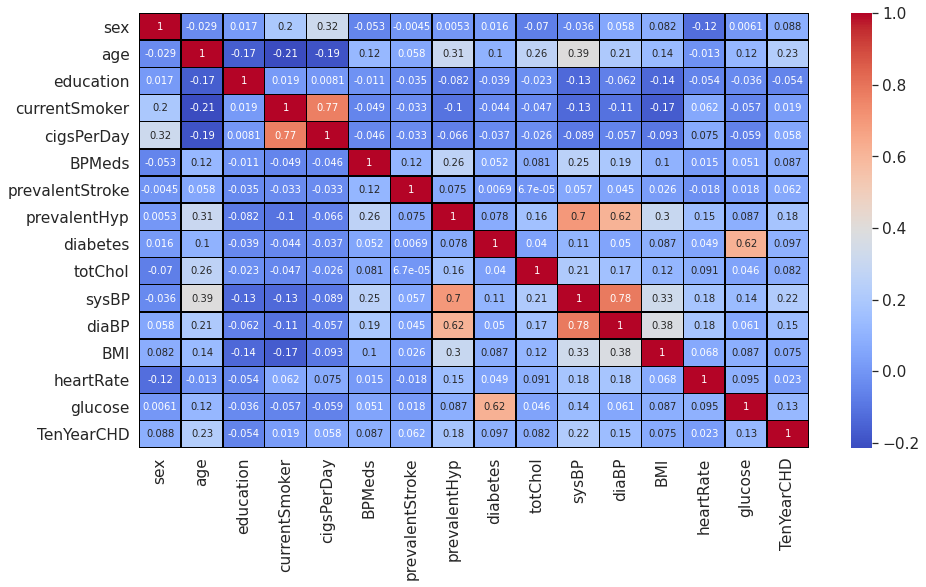

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='coolwarm')
plt.show()

- Positive correlation indicates the values of both variables tend to increase together.
- Negative correlation indicates the values of one variable tend to increase when the values of the other variable decrease.
- The closer r is to zero, the weaker is the linear relationship.

**From this heat map we can see the following correlations:**


*   62% correlation between glucose level and diabetes
*   70% correlation between systolic blood pressure and prevalent hypertension
*   62% coreelation between diastolic blood pressure and prevalent hypertension and 
*  77% coreelation between cigsPerDay and currentSmoker

**cigsPerDay and currentSmoker has the highest correlation.**


## **Exploratory Data Analysis**

### **Splitting Variables**

we split the attributes based on their data type

In [ ]:
nominalVars = ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
ordinalVars = ['education']
continiousVars = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
discreteVars = ['age', 'cigsPerDay']

### **Visualizing binary variables**

In [ ]:
nominalCount = pd.DataFrame(columns = nominalVars)
for i in nominalVars:
    nominalCount[i] = round(df[i].value_counts()/df[i].count()*100)

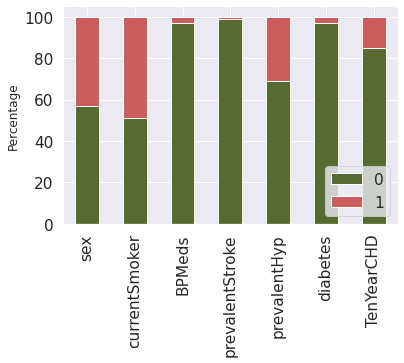

In [ ]:
nominalCount.T.plot(kind="bar", stacked=True, color=['darkolivegreen','indianred'])
plt.legend(loc='lower right')
plt.ylabel("Percentage",fontsize=12)
plt.show()

**Binary or Nominal attributes information:**


*  **sex:** 0 = Female and 1 = Male
*   **currentSmoker:** 0 = non smoker, 1 = smoker
*   **BPMeds:** 0 = Patient is not under blood pressure medication, 1 = Patient is under blood pressure medication
*   **prevalentStroke:** 0 = had stroke in the past, 1 = no stroke 
*   **prevalentHyp:** 0 = no history of hypertension, 1 = has history hypertension
*   **diabetes:** 0 = has diabetes, 1 = no diabetes
*   **TenYearCHD:** 0 = does not have risk of 10 year CHD, 1 = has the risk of 10 year CHD











In [ ]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

`` 0 = no; 1 = yes``

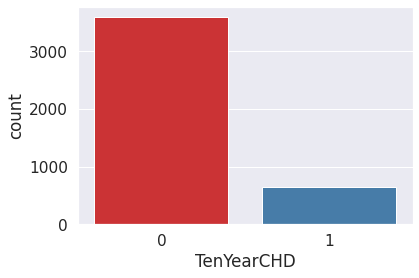

In [ ]:
sns.countplot(df['TenYearCHD'],palette="Set1")

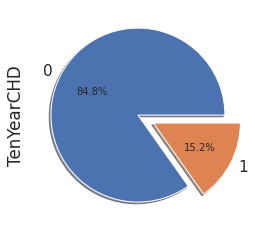

In [ ]:
df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

**From these plots/charts we can see that majority of the pople do not have a 10 year risk oh Coronay Heart Disease(CHD). **

**Only 15.2% of people have 10 year risk of future CHD.**

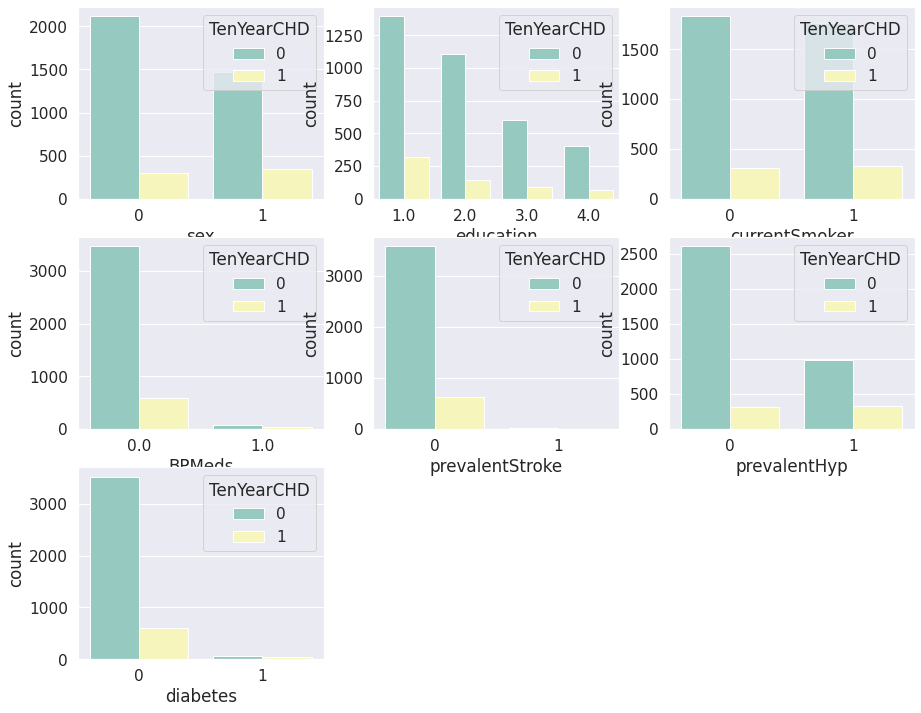

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.countplot('sex',hue='TenYearCHD',data=df, palette="Set3")
plt.subplot(3,3,2)
sns.countplot('education',hue='TenYearCHD',data=df, palette="Set3")
plt.subplot(3,3,3)
sns.countplot('currentSmoker',hue='TenYearCHD',data=df, palette="Set3")
plt.subplot(3,3,4)
sns.countplot('BPMeds',hue='TenYearCHD',data=df, palette="Set3")
plt.subplot(3,3,5)
sns.countplot('prevalentStroke',hue='TenYearCHD',data=df, palette="Set3")
plt.subplot(3,3,6)
sns.countplot('prevalentHyp',hue='TenYearCHD',data=df, palette="Set3")
plt.subplot(3,3,7)
sns.countplot('diabetes',hue='TenYearCHD',data=df, palette="Set3")

plt.show()

In [ ]:
df_sexCHD = df.groupby(["sex","TenYearCHD"]).size()
df_sexCHD

sex  TenYearCHD
0    0             2118
     1              301
1    0             1476
     1              343
dtype: int64

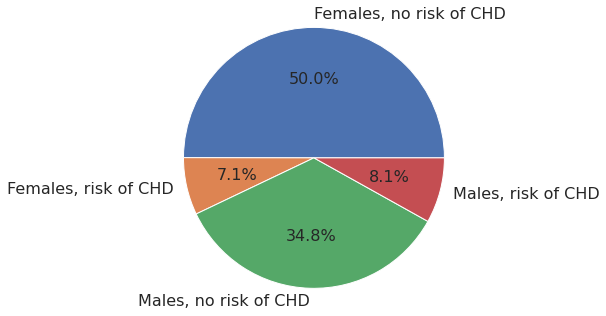

In [ ]:
plt.pie(df_sexCHD.values, labels = ["Females, no risk of CHD", "Females, risk of CHD", "Males, no risk of CHD", "Males, risk of CHD"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

In [ ]:
df_sexDiab = df.groupby(["sex","diabetes"]).size()
df_sexDiab

sex  diabetes
0    0           2362
     1             57
1    0           1767
     1             52
dtype: int64

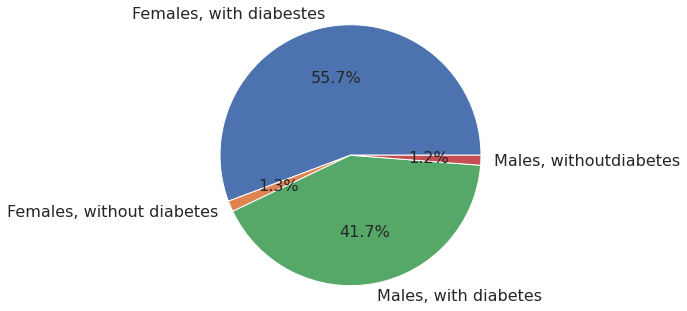

In [ ]:
plt.pie(df_sexDiab.values, labels = ["Females, with diabestes", "Females, without diabetes", "Males, with diabetes", "Males, withoutdiabetes"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()



**1.   TenYearCHD vs sex**
*   Based on this bar chart there seems to be slightly higher risk of 10 year CHD for males

**2.   TenYearCHD vs education**
*   People will good educational backgroud are less likely to have a 10 year risk of CHD.

**3.   TenYearCHD vs currentSmoker**
*   The risk of 10 year CHD is almost the for smokers and non smokers.

**4.   TenYearCHD vs BPMeds**
*   Based on the bar chart people not taking blood pressure medications have higher risk of CHD

**5. TenYearCHD vs prevalentStroke**
*   Residents who have had stroke in the past are at greater risk compared to residents who did not have stroke in the past

**6. TenYearCHD vs prevalentHyp**
*   Hypertensive residents are more likely to get diagnosed with 10 year CHD

**7. TenYearCHD vs diabetes**
*  People with diabetes have a greater risk of CHD












## **Visualizing ordinal variables (education)**

In [ ]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

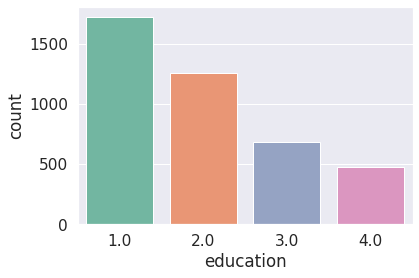

In [ ]:
sns.countplot(df['education'], palette="Set2")

**Ordinal attributes information:**


*   **education:** Gives us information about the education level of the patients.


`` 1 = Some High School; 2 = Diploma; 3 = Some College or Vocational School; 4 = college ``




## **Vizualizing continious variables**

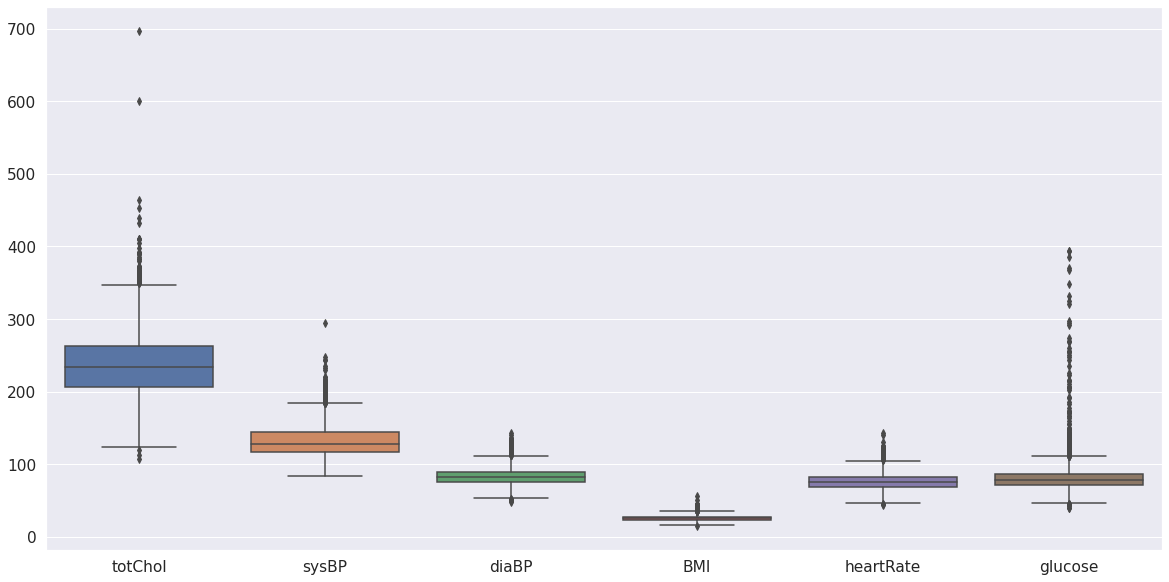

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df[continiousVars])
plt.show()

## **Vizualizing discrete variables**

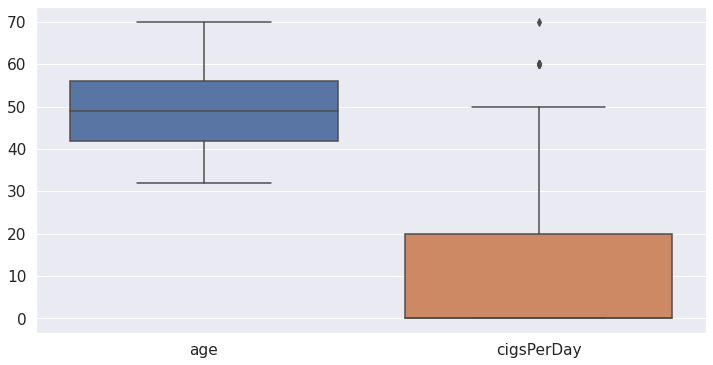

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df[discreteVars])
plt.show()

### **Plotting histogram of age with respect to TenYearCHD**




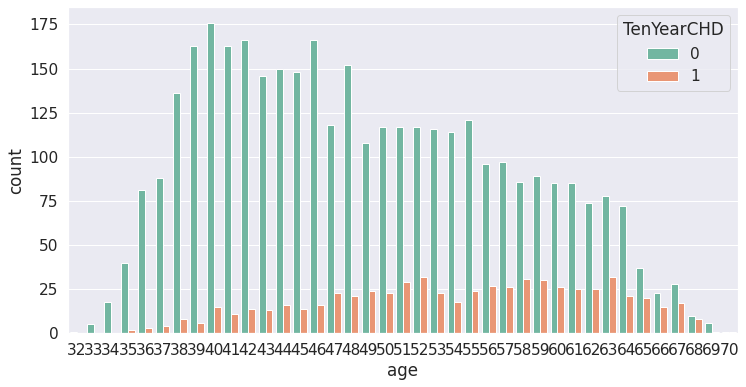

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot('age',hue='TenYearCHD',data=df, palette= 'Set2')

**Through this chart we can see that the risk of CHD increases with age**

# **Data Pre-processing**

#### To check for null values

In [ ]:
df.isna().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

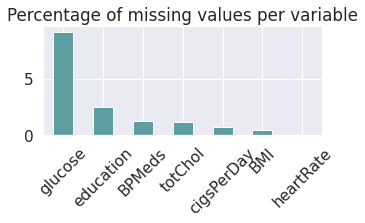

In [ ]:
nul_vals = (df.isna().sum()/len(df)*100).sort_values(ascending = False)
nul_vals.get(nul_vals.values > 0).plot(kind = 'bar',  title = 'Percentage of missing values per variable', figsize = (5,2), legend = False, rot = 45, color = 'cadetblue')
plt.show()

### **Replacing Missing Values**

In [ ]:
for i in nul_vals.get(nul_vals.values > 0).index:
    if i in continiousVars: # for continious we replace the nulls with mean
        avg = df[i].mean()
        df[i].fillna(avg, inplace = True)
        print(f'{i}, average: {round(avg,2)}')
    elif i in nominalVars or i in ordinalVars:  # for nominal/ordinals we replace the nulls with mode
        mod = statistics.mode(df[i])
        df[i].fillna(mod, inplace = True)
        print(f'{i}, mode: {round(mod)}')
    elif i in discreteVars:
        med = statistics.median(df[i])
        df[i].fillna(med, inplace = True)
        print(f'{i}, median: {round(med)}')

glucose, average: 81.97
education, mode: 1
BPMeds, mode: 0
totChol, average: 236.72
cigsPerDay, median: 20
BMI, average: 25.8
heartRate, average: 75.88


In [ ]:
df.isna().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

`` No null values ``

### **Feature engineering**

`` Values cigsPerDay and currentSmoker are redundant ``

`` Now i will create a multilevel categorial variable to classify them as non smoker, heavy smoker and light smoker``

def smoker(i):
    if i['cigsPerDay'] == 0:
        return 0 #here 0 means non smoker
    elif i['cigsPerDay'] < 21:
        return 1 #here 1 means light smoker
    elif i['cigsPerDay'] > 20:
        return 2 #here 2 means heavy smoker
    
df['smoker'] = df.apply (lambda i: smoker(i), axis = 1)

In [ ]:
def smoker(i):
    if i['cigsPerDay'] == 0:
        return 0 #here 0 means non smoker
    elif i['cigsPerDay'] < 21:
        return 1 #here 1 means light smoker
    elif i['cigsPerDay'] > 20:
        return 2 #here 2 means heavy smoker
    
df['smoker'] = df.apply (lambda i: smoker(i), axis = 1)

`` now we drop old variables``

In [ ]:
df.drop(columns = ['cigsPerDay', 'currentSmoker'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['sex', 'age', 'education', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'smoker'],
      dtype='object')

### **To rearrange the columns**

In [ ]:
df = df[['sex', 'age', 'education', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','smoker','TenYearCHD']]

## **To look for outliers:**

`` we look for outliers in discreateVars and continiousVars ``

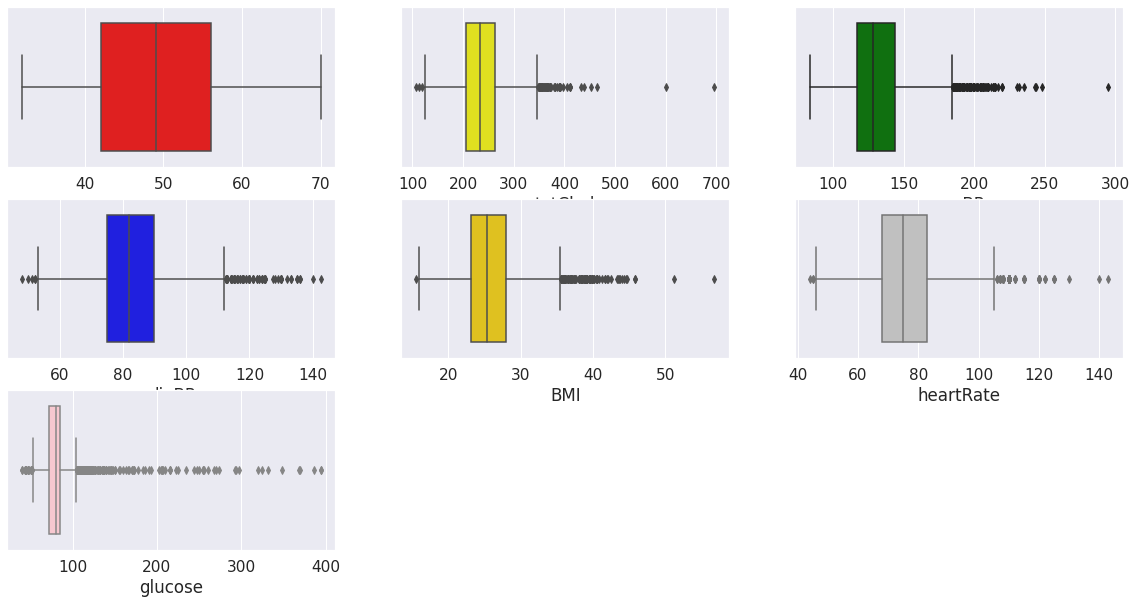

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(3,3,1)
sns.boxplot(df['age'],color='red')
plt.subplot(3,3,2)
sns.boxplot(df['totChol'],color='yellow')
plt.subplot(3,3,3)
sns.boxplot(df['sysBP'],color='green')
plt.subplot(3,3,4)
sns.boxplot(df['diaBP'],color='blue')
plt.subplot(3,3,5)
sns.boxplot(df['BMI'],color='gold')
plt.subplot(3,3,6)
sns.boxplot(df['heartRate'],color='silver')
plt.subplot(3,3,7)
sns.boxplot(df['glucose'],color='pink')

plt.show()

### **Removing the outliers using Z-score**

In [ ]:
from scipy import stats
zscore = np.abs(stats.zscore(df))
threshold = 3
print(np.where(zscore > 3))

(array([  13,   28,   35,   37,   37,   37,   42,   44,   44,   44,   44,
         56,   66,   66,   78,   87,   87,   96,  108,  114,  143,  153,
        154,  158,  158,  161,  165,  194,  247,  249,  249,  249,  249,
        255,  255,  260,  264,  284,  294,  299,  311,  333,  333,  339,
        346,  357,  358,  369,  374,  407,  409,  409,  421,  423,  433,
        443,  443,  446,  446,  451,  458,  471,  471,  475,  481,  481,
        481,  531,  533,  541,  543,  585,  590,  590,  617,  646,  660,
        664,  665,  675,  699,  723,  738,  750,  750,  763,  763,  763,
        786,  795,  829,  833,  833,  833,  833,  864,  864,  864,  890,
        894,  903,  903,  924,  932,  952,  952,  965,  969,  976,  998,
       1003, 1008, 1022, 1030, 1041, 1044, 1068, 1068, 1078, 1079, 1079,
       1110, 1111, 1111, 1123, 1150, 1165, 1183, 1189, 1189, 1197, 1238,
       1238, 1262, 1268, 1268, 1286, 1303, 1333, 1340, 1363, 1363, 1377,
       1389, 1447, 1456, 1470, 1478, 1485, 1485, 1

**To remove the outliers for the dataset**

In [ ]:
df = df[(zscore < 3).all(axis = 1)] 

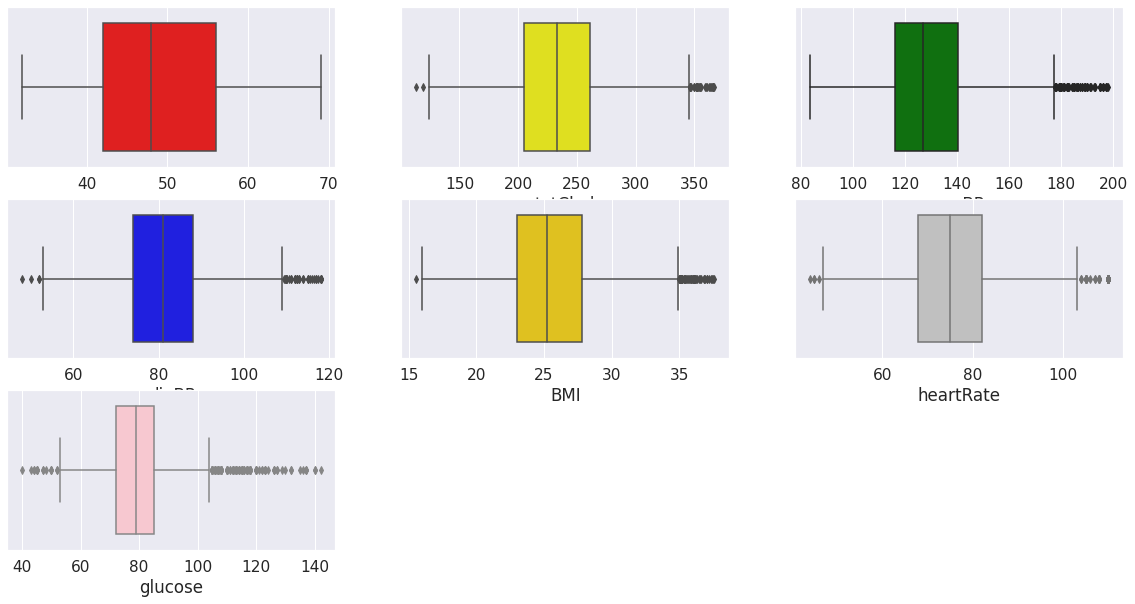

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(3,3,1)
sns.boxplot(df['age'],color='red')
plt.subplot(3,3,2)
sns.boxplot(df['totChol'],color='yellow')
plt.subplot(3,3,3)
sns.boxplot(df['sysBP'],color='green')
plt.subplot(3,3,4)
sns.boxplot(df['diaBP'],color='blue')
plt.subplot(3,3,5)
sns.boxplot(df['BMI'],color='gold')
plt.subplot(3,3,6)
sns.boxplot(df['heartRate'],color='silver')
plt.subplot(3,3,7)
sns.boxplot(df['glucose'],color='pink')

plt.show()

## **Data Normalization**

This Scaler is robust to outliers. Since our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). 

The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. 


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df['totChol'] = scaler.fit_transform(df['totChol'].values.reshape(-1,1))
df['sysBP'] = scaler.fit_transform(df['sysBP'].values.reshape(-1,1))
df['diaBP'] = scaler.fit_transform(df['diaBP'].values.reshape(-1,1))
df['BMI'] = scaler.fit_transform(df['BMI'].values.reshape(-1,1))
df['heartRate'] = scaler.fit_transform(df['heartRate'].values.reshape(-1,1))
df['glucose'] = scaler.fit_transform(df['glucose'].values.reshape(-1,1))
df['age'] = scaler.fit_transform(df['age'].values.reshape(-1,1))


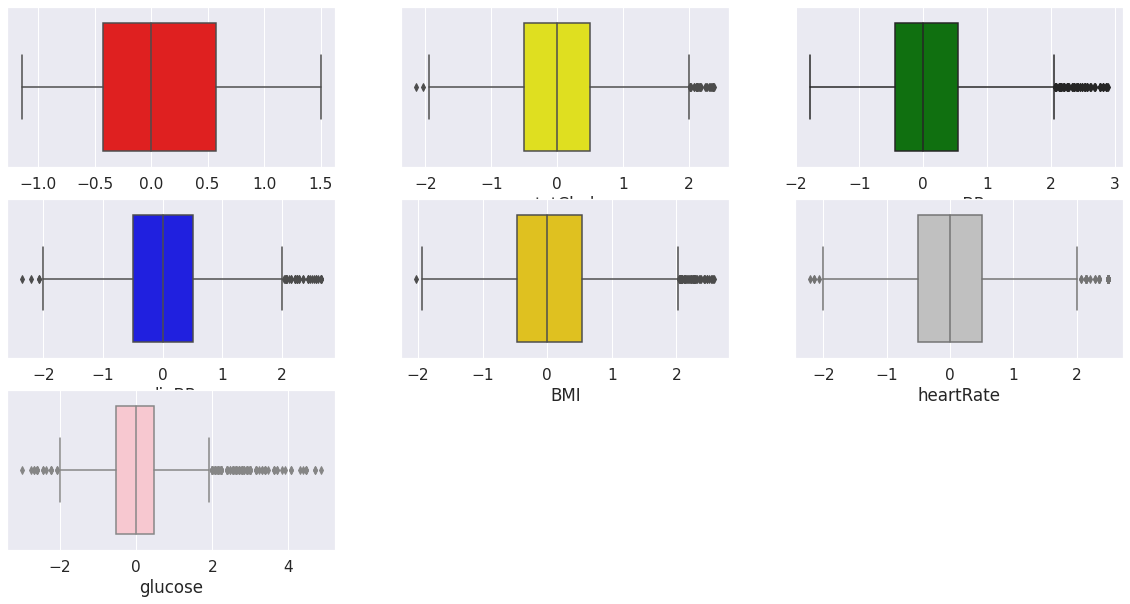

In [ ]:
# to check

plt.figure(figsize = (20,10))

plt.subplot(3,3,1)
sns.boxplot(df['age'],color='red')
plt.subplot(3,3,2)
sns.boxplot(df['totChol'],color='yellow')
plt.subplot(3,3,3)
sns.boxplot(df['sysBP'],color='green')
plt.subplot(3,3,4)
sns.boxplot(df['diaBP'],color='blue')
plt.subplot(3,3,5)
sns.boxplot(df['BMI'],color='gold')
plt.subplot(3,3,6)
sns.boxplot(df['heartRate'],color='silver')
plt.subplot(3,3,7)
sns.boxplot(df['glucose'],color='pink')

plt.show()

In [ ]:
df.head()

,sex,age,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,smoker,TenYearCHD
0,1,-0.642857,4.0,0.0,0,0,0,-0.678571,-0.857143,-0.785714,0.363922,0.357143,-0.153846,0,0
1,0,-0.142857,2.0,0.0,0,0,0,0.303571,-0.244898,0.000000,0.733089,1.428571,-0.230769,0,0
2,1,0.000000,1.0,0.0,0,0,0,0.214286,0.020408,-0.071429,0.022024,0.000000,-0.692308,1,0
3,0,0.928571,3.0,0.0,0,1,0,-0.142857,0.938776,1.000000,0.701626,-0.714286,1.846154,2,1
4,0,-0.142857,3.0,0.0,0,0,0,0.928571,0.122449,0.214286,-0.447824,0.714286,0.461538,2,0


## **To address the class imbalance issue**

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

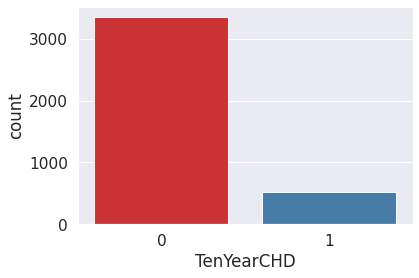

In [ ]:
sns.countplot(df['TenYearCHD'],palette="Set1")

**Addressing the class imbalance using SMOTE to over sample the dataset**

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
over = SMOTE()

X, y = over.fit_resample(X, y)
print(X.shape, y.shape)

#reshaping
y = y.reshape(len(y), 1)
print(X.shape, y.shape)

(6694, 14) (6694,)
(6694, 14) (6694, 1)


**To reshape**

In [ ]:
df_1 = {'TenYearCHD' : y[:,0]}

In [ ]:
df_new = pd.DataFrame(df_1)

Text(0.5, 1.0, 'Class Distributions after resampling')

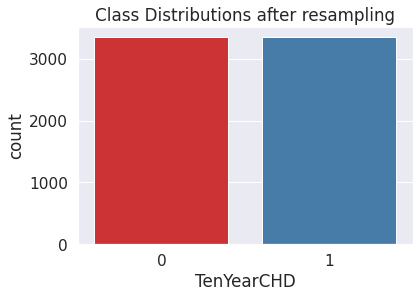

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data = df_new, palette="Set1")
plt.title('Class Distributions after resampling')

# **Dividing the data into 70-30 Train and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=7,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4685, 14)
(2009, 14)
(4685, 1)
(2009, 1)


## **Decision Tree Classifer**

In [ ]:
from sklearn import tree
from sklearn import metrics
myTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)  
myTree = myTree.fit(X_train, y_train)

In [ ]:
predictions = myTree.predict(X_test)

from sklearn.metrics import accuracy_score
DTacc = accuracy_score(y_test, predictions)
print('Accuracy on test data using "Decision Tree" is %.2f' % (DTacc))

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data using "Decision Tree" is 0.72
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       997
           1       0.74      0.69      0.72      1012

    accuracy                           0.72      2009
   macro avg       0.73      0.72      0.72      2009
weighted avg       0.73      0.72      0.72      2009

[[754 243]
 [310 702]]


Accuracy on test data using "Decision Tree" is 0.72


Text(25.5, 0.5, 'True Value')

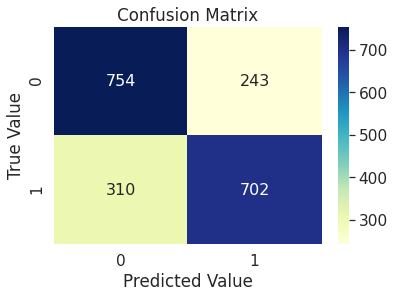

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

DTcm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(DTcm,index=[0,1],columns=[0,1])
print('Accuracy on test data using "Decision Tree" is %.2f' % (DTacc))
sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
myNB = GaussianNB()
myNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predictions = myNB.predict(X_test)
NBacc = accuracy_score(y_test, predictions)
print('Accuracy on test data is %.2f' % (NBacc))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data is 0.64
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       997
           1       0.65      0.64      0.64      1012

    accuracy                           0.64      2009
   macro avg       0.64      0.64      0.64      2009
weighted avg       0.64      0.64      0.64      2009

[[648 349]
 [368 644]]


Accuracy on test data is 0.64


Text(25.5, 0.5, 'True Value')

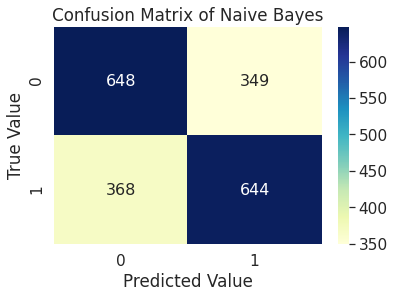

In [ ]:
NBcm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(NBcm,index=[0,1],columns=[0,1])
print('Accuracy on test data is %.2f' % (NBacc))

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix of Naive Bayes")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
myRandFor = RandomForestClassifier()
myRandFor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = myRandFor.predict(X_test)

RFacc = accuracy_score(y_test, predictions)
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)*100))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data is 90.84
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       997
           1       0.90      0.92      0.91      1012

    accuracy                           0.91      2009
   macro avg       0.91      0.91      0.91      2009
weighted avg       0.91      0.91      0.91      2009

[[890 107]
 [ 77 935]]


Accuracy: 90.84121453459433


Text(25.5, 0.5, 'True Value')

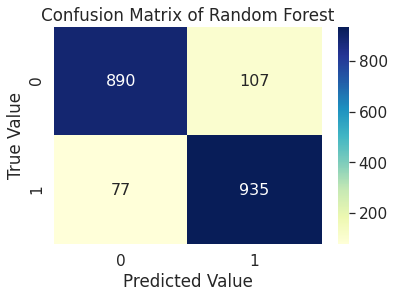

In [ ]:
RFcm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(RFcm,index=[0,1],columns=[0,1])
print("Accuracy:",accuracy_score(y_test, predictions)*100)
test_acc = metrics.accuracy_score(y_test, predictions)

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [ ]:
import math
n = len(y_test)
ci = 1.96 * (math.sqrt((test_acc * (1 - test_acc))/ n))
print('Confidence interval: {}'.format(round(ci, 2)))
print('With repeated trials, we can say with 95% certainty that the performance of this \n \
model will be between {}% and {}%'.format(round((test_acc - ci) * 100, 2), round((test_acc + ci) * 100, 2)))


Confidence interval: 0.01
With repeated trials, we can say with 95% certainty that the performance of this 
 model will be between 89.58% and 92.1%


## **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
mySVM = LinearSVC()
mySVM.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
predictions = mySVM.predict(X_test)

SVMacc = accuracy_score(y_test, predictions)
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)*100))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data is 66.85
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       997
           1       0.66      0.70      0.68      1012

    accuracy                           0.67      2009
   macro avg       0.67      0.67      0.67      2009
weighted avg       0.67      0.67      0.67      2009

[[630 367]
 [299 713]]


Accuracy: 66.84917869586859


Text(25.5, 0.5, 'True Value')

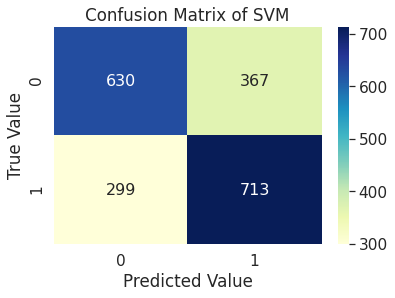

In [ ]:
SVMcm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(SVMcm,index=[0,1],columns=[0,1])
print("Accuracy:",accuracy_score(y_test, predictions)*100)

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix of SVM")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

**Model Selection for SVM using cross validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score

In [ ]:
crossValResults = [] # to store the cross validation results of all the cv_acc 1-25
for i in range(1,26): # to loop the n_neighbours parameter 1-25
  C = i 

  model = SVC(C=C, kernel="rbf")
  model.fit(X_train, y_train)

  # Specify the corss validation parameters
  cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

  # Rum the corss-validation processing pipline 
  cv_acc = cross_val_score(estimator=model,
                         X=X_train,
                         y=y_train,
                         cv=cv,
                         n_jobs=-1) 
  result = np.mean(cv_acc)
  crossValResults.append(result) # to append (add) the result to "crossValResults" list
  print("When the n_neighbour parameter is %0.f" %i,"'Cross-validation' is: {:.3f}".format(np.mean(cv_acc)))

When the n_neighbour parameter is 1 'Cross-validation' is: 0.702
When the n_neighbour parameter is 2 'Cross-validation' is: 0.719
When the n_neighbour parameter is 3 'Cross-validation' is: 0.733
When the n_neighbour parameter is 4 'Cross-validation' is: 0.740
When the n_neighbour parameter is 5 'Cross-validation' is: 0.744
When the n_neighbour parameter is 6 'Cross-validation' is: 0.752
When the n_neighbour parameter is 7 'Cross-validation' is: 0.759
When the n_neighbour parameter is 8 'Cross-validation' is: 0.761
When the n_neighbour parameter is 9 'Cross-validation' is: 0.768
When the n_neighbour parameter is 10 'Cross-validation' is: 0.772
When the n_neighbour parameter is 11 'Cross-validation' is: 0.776
When the n_neighbour parameter is 12 'Cross-validation' is: 0.778
When the n_neighbour parameter is 13 'Cross-validation' is: 0.781
When the n_neighbour parameter is 14 'Cross-validation' is: 0.783
When the n_neighbour parameter is 15 'Cross-validation' is: 0.785
When the n_neighbou

In [ ]:
optimalCrossVal = np.argmax(crossValResults)+1 # +1 because the indexing starts from 0 
print(optimalCrossVal)

25


In [ ]:
mySVM2 = SVC(C=optimalCrossVal, kernel="rbf")
mySVM2.fit(X_train, y_train)
y_pred = model.predict(X_test)
SVM2_acc = metrics.accuracy_score(y_pred, y_test)

# Specify the corss validation parameters
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# Rum the corss-validation processing pipline 
SVM_cv_acc = cross_val_score(estimator=model,
                         X=X_train,
                         y=y_train,
                         cv=cv,
                         n_jobs=-1) 

print("Cross-validation is: {:.3f}".format(np.mean(SVM_cv_acc)), "and the 'Test Accuracy' is: {:.3f}".format(SVM2_acc) )

Cross-validation is: 0.807 and the 'Test Accuracy' is: 0.825


## **K-Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
myKNN = KNeighborsClassifier()
myKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictions = myKNN.predict(X_test)

KNN = accuracy_score(y_test, predictions)
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)*100))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data is 80.04
              precision    recall  f1-score   support

           0       0.97      0.62      0.75       997
           1       0.72      0.98      0.83      1012

    accuracy                           0.80      2009
   macro avg       0.84      0.80      0.79      2009
weighted avg       0.84      0.80      0.79      2009

[[617 380]
 [ 21 991]]


Accuracy: 80.03982080637132


Text(25.5, 0.5, 'True Value')

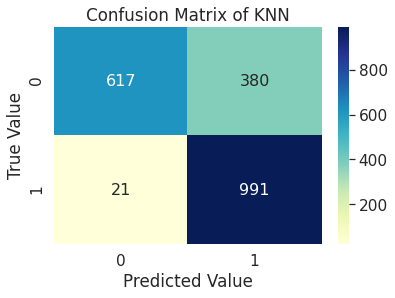

In [ ]:
KNNcm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(KNNcm,index=[0,1],columns=[0,1])
print("Accuracy:",accuracy_score(y_test, predictions)*100)

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix of KNN")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

**Model Selection for KNN using cross validation**

In [ ]:
crossValResults = [] # to store the cross validation results of all the cv_acc 1-25
for i in range(1,26): # to loop the n_neighbours parameter 1-25
  n_neighbors = i 

  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  KNN_acc = metrics.accuracy_score(y_pred, y_test)

  # Specify the corss validation parameters
  cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

  # Rum the corss-validation processing pipline 
  KNN_cv_acc = cross_val_score(estimator=model,
                         X=X_train,
                         y=y_train,
                         cv=cv,
                         n_jobs=-1) 
  result = np.mean(KNN_cv_acc)
  crossValResults.append(result) # to append (add) the result to "crossValResults" list
  print("When the n_neighbour parameter is %0.f" %i,"'Cross-validation' is: {:.3f}".format(np.mean(KNN_cv_acc)))

When the n_neighbour parameter is 1 'Cross-validation' is: 0.866
When the n_neighbour parameter is 2 'Cross-validation' is: 0.879
When the n_neighbour parameter is 3 'Cross-validation' is: 0.815
When the n_neighbour parameter is 4 'Cross-validation' is: 0.831
When the n_neighbour parameter is 5 'Cross-validation' is: 0.790
When the n_neighbour parameter is 6 'Cross-validation' is: 0.802
When the n_neighbour parameter is 7 'Cross-validation' is: 0.774
When the n_neighbour parameter is 8 'Cross-validation' is: 0.781
When the n_neighbour parameter is 9 'Cross-validation' is: 0.754
When the n_neighbour parameter is 10 'Cross-validation' is: 0.772
When the n_neighbour parameter is 11 'Cross-validation' is: 0.746
When the n_neighbour parameter is 12 'Cross-validation' is: 0.758
When the n_neighbour parameter is 13 'Cross-validation' is: 0.742
When the n_neighbour parameter is 14 'Cross-validation' is: 0.749
When the n_neighbour parameter is 15 'Cross-validation' is: 0.733
When the n_neighbou

In [ ]:
optimalCrossVal = np.argmax(crossValResults)+1 # +1 because the indexing starts from 0 
print(optimalCrossVal)

2


**Now we check the accuracy for the optimal parameter using cross validation for model evaluation**

In [ ]:
myKNN2 = KNeighborsClassifier(n_neighbors = 2) # 2 is the optimal parameter of K
myKNN2.fit(X_train, y_train)
y_pred = myKNN2.predict(X_test)
KNN_acc = metrics.accuracy_score(y_pred, y_test)
# Specify the corss validation parameters
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# Rum the corss-validation processing pipline 
KNN_cv_acc = cross_val_score(estimator=model,
                         X=X_train,
                         y=y_train,
                         cv=cv,
                         n_jobs=-1) 

print("Cross-validation is: {:.3f}".format(np.mean(KNN_cv_acc)), "and the 'Test Accuracy' is: {:.3f}".format(np.mean(KNN_acc)) )


Cross-validation is: 0.708 and the 'Test Accuracy' is: 0.888


Accuracy: 88.80039820806371


Text(25.5, 0.5, 'True Value')

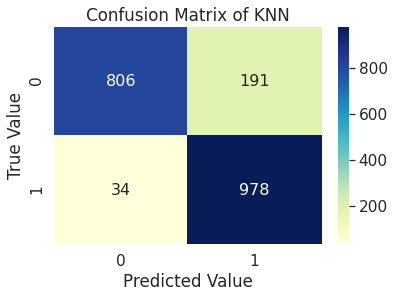

In [ ]:
KNN2cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(KNN2cm,index=[0,1],columns=[0,1])
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix of KNN")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [ ]:
cvmodel_eval = pd.DataFrame({'Model': ['SVM','SVM using cross validation (k-fold)','KNN',
                                   'KNN using cross validation'], 
                         'Accuracy': [round(SVMacc*100,2), round(SVM2_acc*100,2), 
                                      round(KNN *100,2),round(KNN_acc*100,2)]})
cvmodel_eval

,Model,Accuracy
0,SVM,66.85
1,SVM using cross validation (k-fold),82.53
2,KNN,80.04
3,KNN using cross validation,88.80


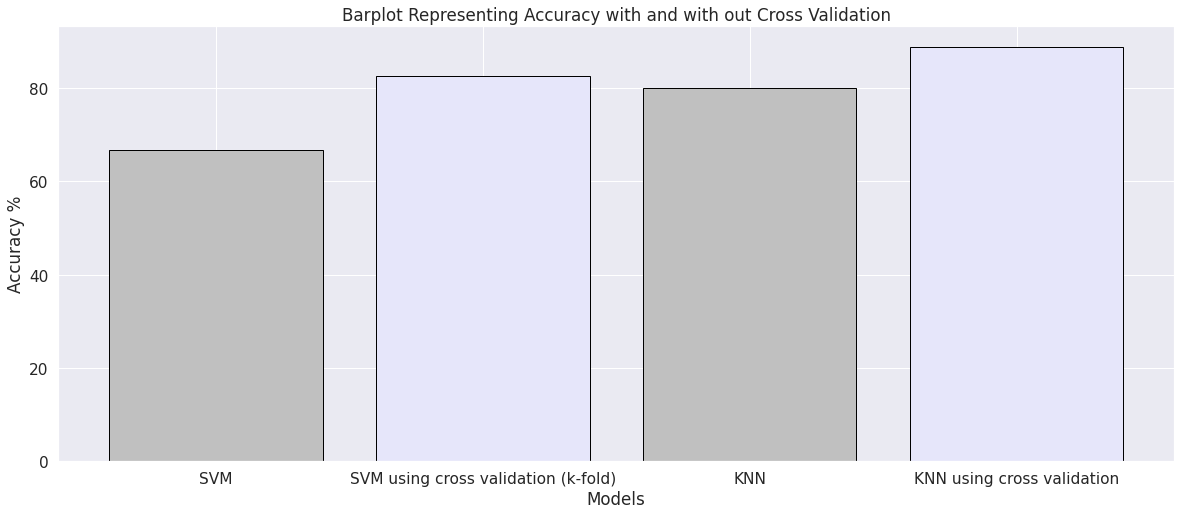

In [ ]:
colors = ['silver','lavender']
plt.figure(figsize=(20,8), facecolor='w')
plt.title("Barplot Representing Accuracy with and with out Cross Validation")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(cvmodel_eval['Model'],cvmodel_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()

In [ ]:
model_eval = pd.DataFrame({'Model': ['Decision Tree','Naive Bayes','Random Forest',
                                   'SVM','KNN'], 
                         'Accuracy': [round(DTacc*100,2), round(NBacc*100,2), 
                                      round(RFacc*100,2),round(SVM2_acc*100,2),round(KNNacc*100,2)]})
model_eval

,Model,Accuracy
0,Decision Tree,72.47
1,Naive Bayes,64.31
2,Random Forest,90.84
3,SVM,82.53
4,KNN,78.50


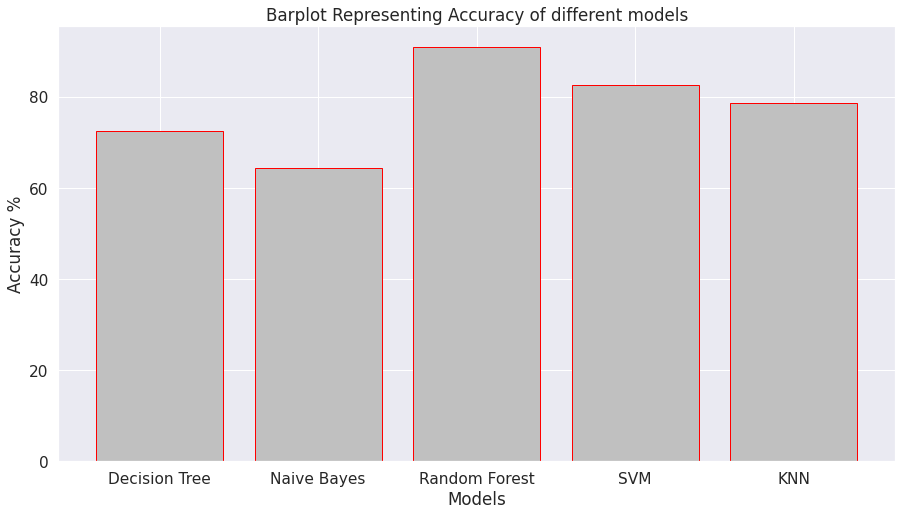

In [ ]:
colors = ['silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='red')
plt.show()

## **Principal Component Analysis for dimentionality reduction**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:

# To reduce the dimentionality 
pca = PCA(n_components = 10)

# To standardize the training and testing dataset
sc = StandardScaler()
sc.fit_transform(X_train)
X_train_std = sc.transform(X_train)

# To extract the principal components
pca.fit(X_train_std)
print(' The Principal Components are: \n {}'.format(pca.components_))

print('\nThe PCA Eigenvalues are: \n {}'.format(pca.explained_variance_))

print('\nThe PCA Variance Ratios are: {}'.format(pca.explained_variance_ratio_))

# To project the train dataset onto the2 major principal components
X_train_proj_sklearn = pca.transform(X_train_std)

# To project the test dataset onto the2 major principal components
X_test_std = sc.transform(X_test)
X_test_proj_sklearn = pca.transform(X_test_std)

 The Principal Components are: 
 [[ 2.33077662e-02  2.97080732e-01 -9.79807104e-02 -1.11022302e-16
  -0.00000000e+00  4.80753870e-01 -2.16840434e-19  2.01629059e-01
   5.26306841e-01  4.81697156e-01  2.84785875e-01  1.34557733e-01
   1.16221128e-01 -8.98545304e-02]
 [ 5.94986437e-01 -2.98979343e-01  8.84838365e-02  0.00000000e+00
   0.00000000e+00  6.94417234e-02  6.93889390e-18 -1.41083131e-01
   6.98028544e-02  2.00383433e-01  2.27847509e-02  1.22359854e-01
  -1.54439865e-01  6.63082039e-01]
 [-4.86627242e-01 -3.61693389e-01  1.59399214e-01 -5.55111512e-17
   0.00000000e+00  8.98997739e-02  0.00000000e+00 -7.75875834e-02
   7.10492184e-02  1.12858478e-01 -2.76520907e-01  6.99225646e-01
   5.88327539e-02  7.89637369e-02]
 [-8.87480379e-03 -6.64023714e-02  8.91462341e-01 -5.72458747e-17
  -1.17961196e-16  1.11920228e-01 -8.67361738e-17  1.15151003e-01
   8.31279808e-02  1.43926125e-01 -1.51278942e-01 -3.14394633e-01
  -8.36078681e-02 -1.36661614e-01]
 [ 1.28857046e-01 -1.07065952e-02  

## **To build a KNN Model on reduced dataset**

In [ ]:
from sklearn.metrics import classification_report

PCAKNN = KNeighborsClassifier(n_neighbors = 1)
PCAKNN.fit(X_train_proj_sklearn, y_train)
y_pred = PCAKNN.predict(X_test_proj_sklearn)

KNNaccuracy = metrics.accuracy_score(y_test, y_pred)
print('Model Accuracy: {}%'.format(int(KNNaccuracy*100)))
print(classification_report(y_test,y_pred))

Model Accuracy: 88%
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       997
           1       0.82      0.99      0.90      1012

    accuracy                           0.89      2009
   macro avg       0.91      0.89      0.89      2009
weighted avg       0.91      0.89      0.89      2009



## **To build a Random Forest model on reduced data:**

In [ ]:
PCARF = RandomForestClassifier()
PCARF.fit(X_train_proj_sklearn, y_train)
y_pred = PCARF.predict(X_test_proj_sklearn)

RFaccuracy = metrics.accuracy_score(y_test, y_pred)
print('Model Accuracy: {}%'.format(int(RFaccuracy*100)))
print(classification_report(y_test,y_pred))

Model Accuracy: 87%
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       997
           1       0.86      0.91      0.88      1012

    accuracy                           0.88      2009
   macro avg       0.88      0.88      0.88      2009
weighted avg       0.88      0.88      0.88      2009



## **To build a Naive Bayes model on reduced data:**

In [ ]:
PCANB = GaussianNB()
PCANB.fit(X_train_proj_sklearn, y_train)
y_pred = PCANB.predict(X_test_proj_sklearn)

NBaccuracy = metrics.accuracy_score(y_test, y_pred)
print('Model Accuracy: {}%'.format(int(NBaccuracy*100)))
print(classification_report(y_test,y_pred))

Model Accuracy: 66%
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       997
           1       0.65      0.71      0.68      1012

    accuracy                           0.66      2009
   macro avg       0.66      0.66      0.66      2009
weighted avg       0.66      0.66      0.66      2009



## **To build a SVM model on reduced data:**

In [ ]:
PCASVM = SVC(C=25, kernel="rbf")
PCASVM.fit(X_train_proj_sklearn, y_train)
y_pred = PCASVM.predict(X_test_proj_sklearn)

SVMaccuracy = metrics.accuracy_score(y_test, y_pred)
print('Model Accuracy: {}%'.format(int(SVMaccuracy*100)))
print(classification_report(y_test,y_pred))

Model Accuracy: 85%
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       997
           1       0.81      0.92      0.86      1012

    accuracy                           0.85      2009
   macro avg       0.86      0.85      0.85      2009
weighted avg       0.86      0.85      0.85      2009



In [ ]:
PCADT = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)  
PCADT.fit(X_train_proj_sklearn, y_train)
y_pred = PCADT.predict(X_test_proj_sklearn)

DTaccuracy = metrics.accuracy_score(y_test, y_pred)
print('Model Accuracy: {}%'.format(int(DTaccuracy*100)))
print(classification_report(y_test,y_pred))

Model Accuracy: 65%
              precision    recall  f1-score   support

           0       0.69      0.55      0.61       997
           1       0.63      0.76      0.69      1012

    accuracy                           0.65      2009
   macro avg       0.66      0.65      0.65      2009
weighted avg       0.66      0.65      0.65      2009



# **Comparing models with and without PCA**

In [ ]:
model_eval = pd.DataFrame({'Model': ['Decision Tree','Decision Tree using PCA','Naive Bayes','Naive Bayes using PCA','Random Forest','Random Forest using PCA',
                                   'SVM','SVM using PCA','KNN','KNN using PCA'
                                   ], 
                         'Accuracy': [round(DTacc*100,2),round(DTaccuracy*100,2), round(NBacc*100,2), round(NBaccuracy*100,2),
                                      round(RFacc*100,2),round(RFaccuracy*100,2),round(SVM2_acc*100,2),round(SVMaccuracy*100,2),round(KNN_acc*100,2),round(KNNaccuracy*100,2)]})
model_eval

,Model,Accuracy
0,Decision Tree,72.47
1,Decision Tree using PCA,65.46
2,Naive Bayes,64.31
3,Naive Bayes using PCA,66.15
4,Random Forest,90.84
5,Random Forest using PCA,87.76
6,SVM,82.53
7,SVM using PCA,85.17
8,KNN,88.80
9,KNN using PCA,88.95


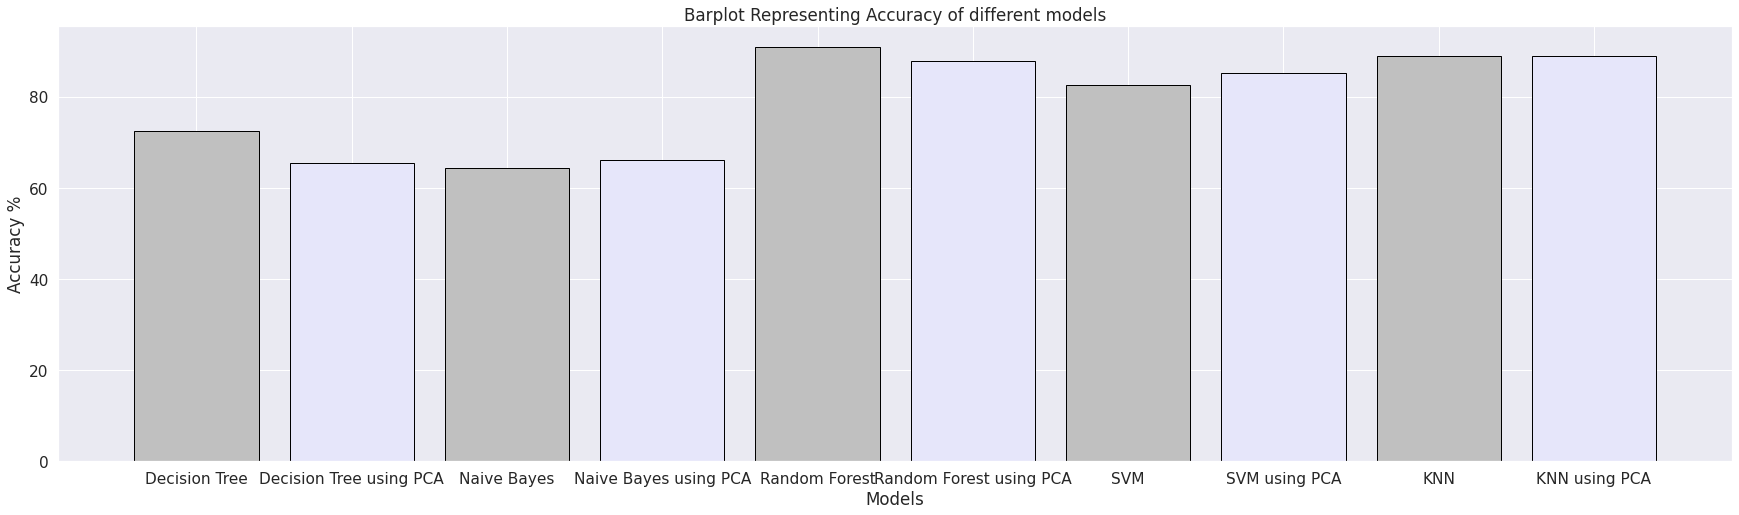

In [ ]:
colors = ['silver','lavender']
plt.figure(figsize=(30,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()

# **To compare the best classifiers (some are with/without PCA)**

In [ ]:
model_eval = pd.DataFrame({'Model': ['Decision Tree','Naive Bayes using PCA','Random Forest',
                                   'SVM using PCA','KNN using PCA'
                                   ], 
                         'Accuracy': [round(DTacc*100,2), round(NBaccuracy*100,2),
                                      round(RFacc*100,2),round(SVMaccuracy*100,2),round(KNNaccuracy*100,2)]})
model_eval

,Model,Accuracy
0,Decision Tree,72.47
1,Naive Bayes using PCA,66.15
2,Random Forest,90.84
3,SVM using PCA,85.17
4,KNN using PCA,88.95


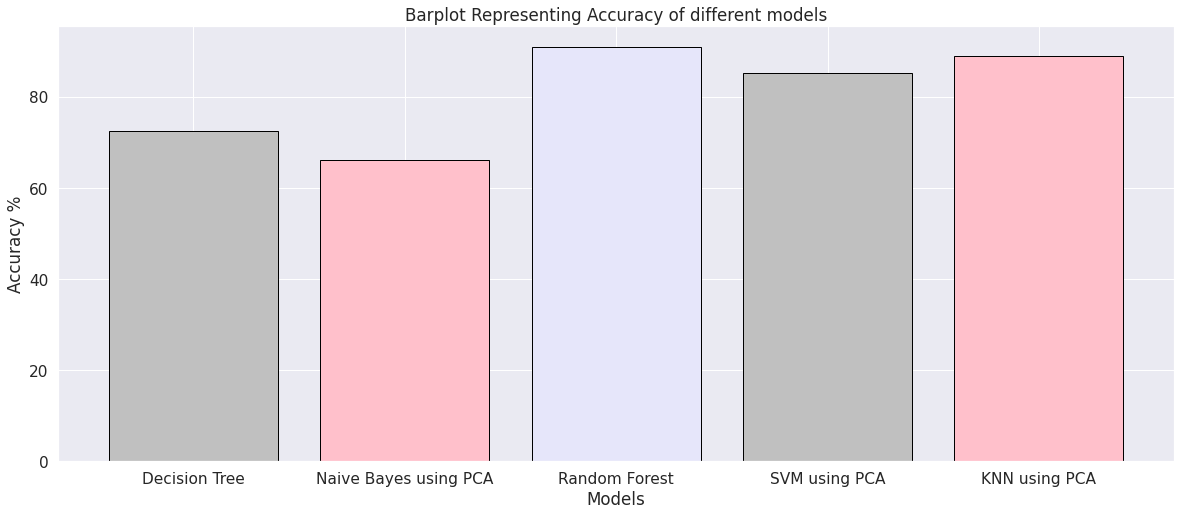

In [ ]:
colors = ['silver','pink','lavender']
plt.figure(figsize=(20,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()

**From this barplot we can see that the Random Forest classifier without PCA yeilds the highest accuracy of 90.84%**

# **Looking at the most important features of our best performing classifier - RANDOM FOREST**

In [ ]:
importance = myRandFor.feature_importances_

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f'% (i,v))

Feature: 0, Score: 0.06068
Feature: 1, Score: 0.16996
Feature: 2, Score: 0.05746
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03510
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.10496
Feature: 8, Score: 0.12131
Feature: 9, Score: 0.09798
Feature: 10, Score: 0.09664
Feature: 11, Score: 0.09746
Feature: 12, Score: 0.10275
Feature: 13, Score: 0.05569


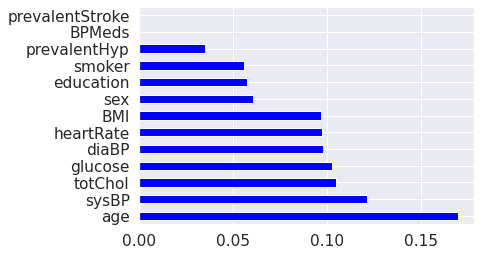

In [ ]:
index= df.columns[:-1]
importance = pd.Series(myRandFor.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

**From this feature importance graph, we can conclude that out of the 15 features we examined the top 5 significant features are :**
- **age**
- **systolic blood pressure**
- **total cholesterol level**
- **heart rate and**
- **glucose level**

In [ ]:
df.head()

,sex,age,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,smoker,TenYearCHD
0,1,-0.642857,4.0,0.0,0,0,0,-0.678571,-0.857143,-0.785714,0.363922,0.357143,-0.153846,0,0
1,0,-0.142857,2.0,0.0,0,0,0,0.303571,-0.244898,0.000000,0.733089,1.428571,-0.230769,0,0
2,1,0.000000,1.0,0.0,0,0,0,0.214286,0.020408,-0.071429,0.022024,0.000000,-0.692308,1,0
3,0,0.928571,3.0,0.0,0,1,0,-0.142857,0.938776,1.000000,0.701626,-0.714286,1.846154,2,1
4,0,-0.142857,3.0,0.0,0,0,0,0.928571,0.122449,0.214286,-0.447824,0.714286,0.461538,2,0


### **To see if the prediction works**

` I randomly added a data to see what this model predicts`

In [ ]:
print(myRandFor.predict(sc.transform([[1,39,4.0,1.0,1,1,0,195,150,81,28.0,96,76,0]])))

[0]


#### **Some extra plots to add to the presentation**

In [ ]:
model_eval = pd.DataFrame({'Model': ['Decision Tree','Decision Tree using PCA'
                                   ], 
                         'Accuracy': [round(DTacc*100,2),round(DTaccuracy*100,2)]})
model_eval

,Model,Accuracy
0,Decision Tree,72.47
1,Decision Tree using PCA,65.46


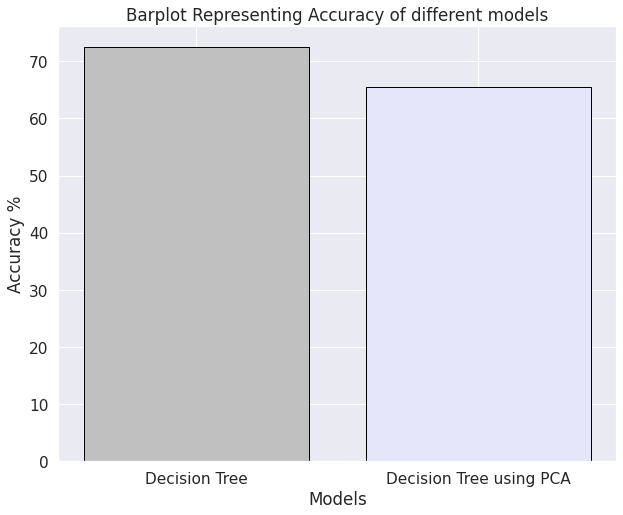

In [ ]:
colors = ['silver','lavender']
plt.figure(figsize=(10,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()

In [ ]:
model_eval = pd.DataFrame({'Model': ['Naive Bayes','Naive Bayes using PCA'
                                   ], 
                         'Accuracy': [ round(NBacc*100,2), round(NBaccuracy*100,2)]})
model_eval

,Model,Accuracy
0,Naive Bayes,64.31
1,Naive Bayes using PCA,66.15


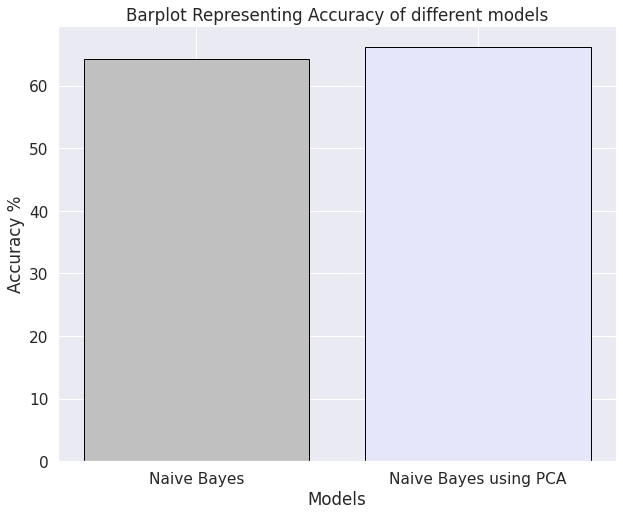

In [ ]:
colors = ['silver','lavender']
plt.figure(figsize=(10,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()

In [ ]:
model_eval = pd.DataFrame({'Model': ['Random Forest','Random Forest using PCA'
                                   ], 
                         'Accuracy': [
                                      round(RFacc*100,2),round(RFaccuracy*100,2)]})
model_eval

,Model,Accuracy
0,Random Forest,90.84
1,Random Forest using PCA,87.76


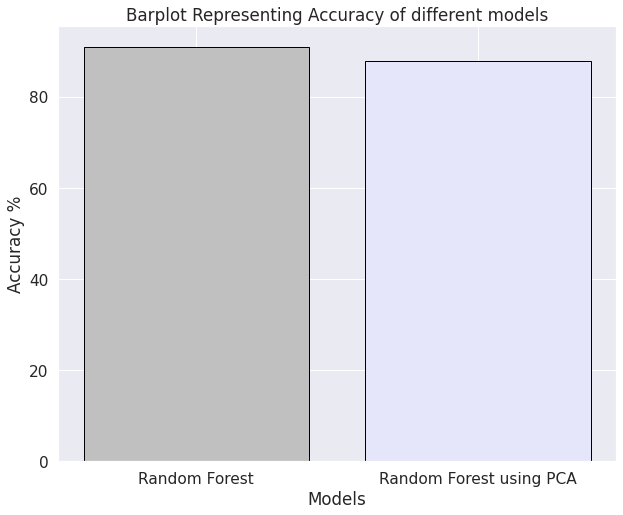

In [ ]:
colors = ['silver','lavender']
plt.figure(figsize=(10,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()

In [ ]:
model_eval = pd.DataFrame({'Model': [
                                   'SVM','SVM using PCA'
                                   ], 
                         'Accuracy': [round(SVM2_acc*100,2),round(SVMaccuracy*100,2)]})
model_eval

,Model,Accuracy
0,SVM,82.53
1,SVM using PCA,85.17


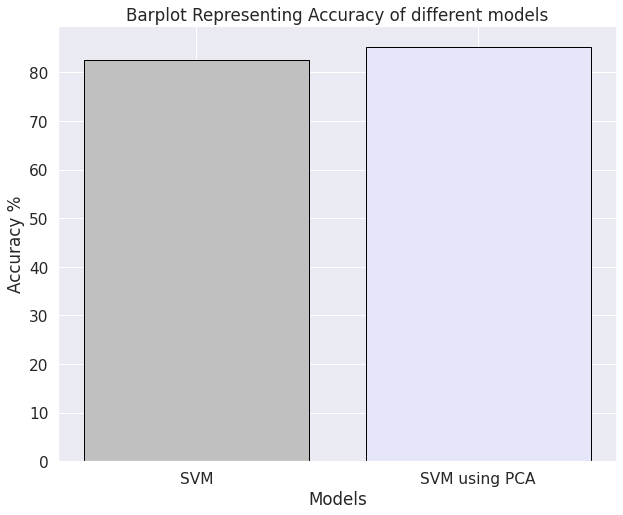

In [ ]:
colors = ['silver','lavender']
plt.figure(figsize=(10,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()

In [ ]:
model_eval = pd.DataFrame({'Model': ['KNN','KNN using PCA'
                                   ], 
                         'Accuracy': [round(KNNacc*100,2),round(KNNaccuracy*100,2)]})
model_eval

,Model,Accuracy
0,KNN,78.50
1,KNN using PCA,88.95


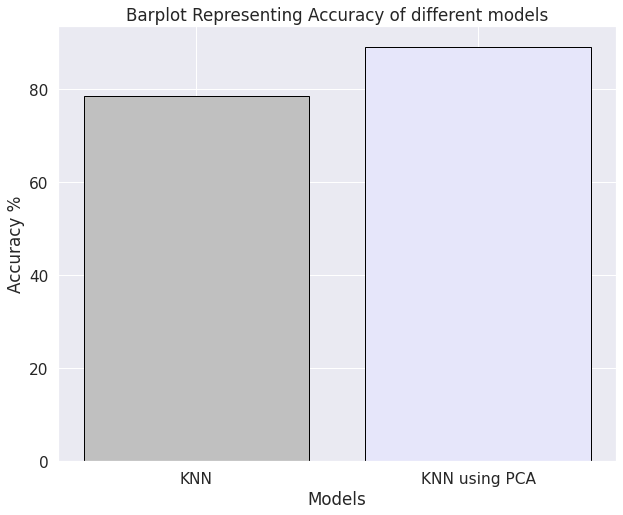

In [ ]:
colors = ['silver','lavender']
plt.figure(figsize=(10,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()